# Data Preparation & Cleaning
This steps involves importing the relevant python libraries, importing the source data, and cleaning and shaping the data for it to be useful for our analyses
Steps 1
Stpe 2
Step 3
Step 4

In [593]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import datetime as dt
import seaborn as sns

In [594]:
# Import data files
death_data_path = "data/DeathsByState.csv"
population_data_path = "data/PopulationByState.csv"

# Read the data and the study results
death_data = pd.read_csv(death_data_path)
population_data = pd.read_csv(population_data_path, index_col = False)

#Print data to understand basic shape and content
print(f'{death_data}')
print(f'{population_data}')

     Data As Of Jurisdiction of Occurrence  MMWR Year  MMWR Week  \
0      2/8/2023              United States       2020          1   
1      2/8/2023              United States       2020          2   
2      2/8/2023              United States       2020          3   
3      2/8/2023              United States       2020          4   
4      2/8/2023              United States       2020          5   
...         ...                        ...        ...        ...   
8689   2/8/2023                Puerto Rico       2022         52   
8690   2/8/2023                Puerto Rico       2023          1   
8691   2/8/2023                Puerto Rico       2023          2   
8692   2/8/2023                Puerto Rico       2023          3   
8693   2/8/2023                Puerto Rico       2023          4   

     Week Ending Date  All Cause  Natural Cause  Septicemia (A40-A41)  \
0            1/4/2020    60176.0        55009.0                 843.0   
1           1/11/2020    60744.0     

In [595]:
#Obtain list of columns for death_data
death_data.columns

Index(['Data As Of', 'Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)', 'flag_allcause',
       'flag_natcause', 'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz',
       'flag_inflpn', 'flag_clrd', 'flag_otherresp', 'flag_nephr',
       'fl

In [596]:
#Obtain list of columns for populatuion_data
population_data.columns

Index(['State', '2020', '2021', '2022'], dtype='object')

In [597]:
d_cause = death_data["Jurisdiction of Occurrence"].value_counts()
d_cause 

United States           161
Pennsylvania            161
Nevada                  161
New Hampshire           161
New Jersey              161
New Mexico              161
New York                161
New York City           161
North Carolina          161
North Dakota            161
Ohio                    161
Oklahoma                161
Oregon                  161
Rhode Island            161
Alabama                 161
South Carolina          161
South Dakota            161
Tennessee               161
Texas                   161
Utah                    161
Vermont                 161
Virginia                161
Washington              161
West Virginia           161
Wisconsin               161
Wyoming                 161
Nebraska                161
Montana                 161
Missouri                161
Mississippi             161
Alaska                  161
Arizona                 161
Arkansas                161
California              161
Colorado                161
Connecticut         

In [598]:
reduced_df = death_data.drop(['Data As Of','flag_allcause',
       'flag_natcause', 'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz',
       'flag_inflpn', 'flag_clrd', 'flag_otherresp', 'flag_nephr',
       'flag_otherunk', 'flag_hd', 'flag_stroke', 'flag_cov19mcod',
       'flag_cov19ucod'], axis = 1)

In [599]:
filtered_df = reduced_df.loc[(reduced_df["Jurisdiction of Occurrence"]!="United States") &
(reduced_df["Jurisdiction of Occurrence"]!="New York City") &
(reduced_df["MMWR Year"]!=2023)                            ]
filtered_df

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
161,Alabama,2020,1,1/4/2020,1082.0,1009.0,15.0,196.0,25.0,54.0,28.0,86.0,13.0,25.0,25.0,268.0,81.0,0.0,0.0
162,Alabama,2020,2,1/11/2020,1127.0,1060.0,25.0,197.0,17.0,41.0,27.0,72.0,20.0,23.0,34.0,274.0,68.0,0.0,0.0
163,Alabama,2020,3,1/18/2020,1039.0,976.0,28.0,201.0,24.0,53.0,31.0,73.0,21.0,23.0,24.0,239.0,45.0,0.0,0.0
164,Alabama,2020,4,1/25/2020,1056.0,982.0,16.0,190.0,23.0,54.0,29.0,61.0,11.0,14.0,23.0,284.0,70.0,NaN,0.0
165,Alabama,2020,5,2/1/2020,1026.0,949.0,15.0,157.0,16.0,58.0,31.0,76.0,17.0,20.0,23.0,265.0,55.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,Puerto Rico,2022,48,12/3/2022,697.0,664.0,11.0,105.0,48.0,69.0,20.0,13.0,16.0,25.0,25.0,108.0,18.0,41.0,34.0
8686,Puerto Rico,2022,49,12/10/2022,728.0,689.0,14.0,112.0,64.0,69.0,18.0,20.0,14.0,25.0,31.0,119.0,30.0,39.0,35.0
8687,Puerto Rico,2022,50,12/17/2022,719.0,692.0,20.0,98.0,64.0,60.0,25.0,27.0,NaN,29.0,22.0,126.0,28.0,38.0,28.0
8688,Puerto Rico,2022,51,12/24/2022,695.0,667.0,24.0,92.0,62.0,54.0,19.0,25.0,NaN,21.0,28.0,121.0,27.0,36.0,32.0


In [600]:
filtered_df.dtypes

Jurisdiction of Occurrence                                                                            object
MMWR Year                                                                                              int64
MMWR Week                                                                                              int64
Week Ending Date                                                                                      object
All Cause                                                                                            float64
Natural Cause                                                                                        float64
Septicemia (A40-A41)                                                                                 float64
Malignant neoplasms (C00-C97)                                                                        float64
Diabetes mellitus (E10-E14)                                                                          float64
Alzheimer disease (

In [601]:
# Change date dtype from object to datetime 
filtered_df['Week Ending Date'] = pd.to_datetime(filtered_df['Week Ending Date'])
filtered_df['MMWR Year'] = pd.to_datetime(filtered_df['MMWR Year'])

C:\Users\joshu\AppData\Local\Temp\ipykernel_8432\3373069225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Week Ending Date'] = pd.to_datetime(filtered_df['Week Ending Date'])
C:\Users\joshu\AppData\Local\Temp\ipykernel_8432\3373069225.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MMWR Year'] = pd.to_datetime(filtered_df['MMWR Year'])


In [602]:
filtered_df.dtypes

Jurisdiction of Occurrence                                                                                   object
MMWR Year                                                                                            datetime64[ns]
MMWR Week                                                                                                     int64
Week Ending Date                                                                                     datetime64[ns]
All Cause                                                                                                   float64
Natural Cause                                                                                               float64
Septicemia (A40-A41)                                                                                        float64
Malignant neoplasms (C00-C97)                                                                               float64
Diabetes mellitus (E10-E14)                                             

In [603]:
# Add month, year, and month-year columns
filtered_df['Month'] = pd.DatetimeIndex(filtered_df['Week Ending Date']).month
filtered_df['MMWR Year'] = pd.DatetimeIndex(filtered_df['Week Ending Date']).year
filtered_df['Month-Year'] = filtered_df['Week Ending Date'].dt.to_period('M')     

C:\Users\joshu\AppData\Local\Temp\ipykernel_8432\359780958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = pd.DatetimeIndex(filtered_df['Week Ending Date']).month
C:\Users\joshu\AppData\Local\Temp\ipykernel_8432\359780958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['MMWR Year'] = pd.DatetimeIndex(filtered_df['Week Ending Date']).year
C:\Users\joshu\AppData\Local\Temp\ipykernel_8432\359780958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [604]:
# Format 'Week Ending Date'
filtered_df['Month'] = filtered_df['Week Ending Date'].dt.strftime('%B')
filtered_df.head()

C:\Users\joshu\AppData\Local\Temp\ipykernel_8432\850858574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['Week Ending Date'].dt.strftime('%B')


,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",Month,Month-Year
161,Alabama,2020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,...,86.0,13.0,25.0,25.0,268.0,81.0,0.0,0.0,January,2020-01
162,Alabama,2020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,...,72.0,20.0,23.0,34.0,274.0,68.0,0.0,0.0,January,2020-01
163,Alabama,2020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,...,73.0,21.0,23.0,24.0,239.0,45.0,0.0,0.0,January,2020-01
164,Alabama,2020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,...,61.0,11.0,14.0,23.0,284.0,70.0,NaN,0.0,January,2020-01
165,Alabama,2020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,...,76.0,17.0,20.0,23.0,265.0,55.0,0.0,0.0,February,2020-02


In [605]:
filtered_df

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),...,Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",Month,Month-Year
161,Alabama,2020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,...,86.0,13.0,25.0,25.0,268.0,81.0,0.0,0.0,January,2020-01
162,Alabama,2020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,...,72.0,20.0,23.0,34.0,274.0,68.0,0.0,0.0,January,2020-01
163,Alabama,2020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,...,73.0,21.0,23.0,24.0,239.0,45.0,0.0,0.0,January,2020-01
164,Alabama,2020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,...,61.0,11.0,14.0,23.0,284.0,70.0,NaN,0.0,January,2020-01
165,Alabama,2020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,...,76.0,17.0,20.0,23.0,265.0,55.0,0.0,0.0,February,2020-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8685,Puerto Rico,2022,48,2022-12-03,697.0,664.0,11.0,105.0,48.0,69.0,...,13.0,16.0,25.0,25.0,108.0,18.0,41.0,34.0,December,2022-12
8686,Puerto Rico,2022,49,2022-12-10,728.0,689.0,14.0,112.0,64.0,69.0,...,20.0,14.0,25.0,31.0,119.0,30.0,39.0,35.0,December,2022-12
8687,Puerto Rico,2022,50,2022-12-17,719.0,692.0,20.0,98.0,64.0,60.0,...,27.0,NaN,29.0,22.0,126.0,28.0,38.0,28.0,December,2022-12
8688,Puerto Rico,2022,51,2022-12-24,695.0,667.0,24.0,92.0,62.0,54.0,...,25.0,NaN,21.0,28.0,121.0,27.0,36.0,32.0,December,2022-12


In [606]:
filtered_df.columns

Index(['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)', 'Month', 'Month-Year'],
      dtype='object')

In [607]:
# Rename columns for readability
renamed_df = filtered_df.rename(columns={'Jurisdiction of Occurrence':'State', 'MMWR Year': 'Year', 'MMWR Week':'Week', 'Week Ending Date': 'Date',
                                         'Septicemia (A40-A41)':'Septicemia (Blood Poisoning/ Infection)', 'Malignant neoplasms (C00-C97)':'Cancer',
                                         'Diabetes mellitus (E10-E14)': 'Diabetes', 'Alzheimer disease (G30)':'Alzheimer Diseases', 
                                         'Influenza and pneumonia (J09-J18)':'Influenza & Pneumonia', 'Chronic lower respiratory diseases (J40-J47)':'Chronic Lower Respiratory Diseases', 
                                         'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)':'Other Diseases of Respiratory System',
                                        'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)':'Unclassified',
                                         'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)': 'Kidney Disease', 'Diseases of heart (I00-I09,I11,I13,I20-I51)':'Heart Diseases',
                                         'Cerebrovascular diseases (I60-I69)': 'Cerebrovascular Diseases', 'COVID-19 (U071, Multiple Cause of Death)':'COVID-19 (Multiple Cause of Death)',
                                         'COVID-19 (U071, Underlying Cause of Death)':'COVID-19 (Underlying Cause of Death)'
                                        })
renamed_df.head()

,State,Year,Week,Date,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,...,Chronic Lower Respiratory Diseases,Other Diseases of Respiratory System,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),Month,Month-Year
161,Alabama,2020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,...,86.0,13.0,25.0,25.0,268.0,81.0,0.0,0.0,January,2020-01
162,Alabama,2020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,...,72.0,20.0,23.0,34.0,274.0,68.0,0.0,0.0,January,2020-01
163,Alabama,2020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,...,73.0,21.0,23.0,24.0,239.0,45.0,0.0,0.0,January,2020-01
164,Alabama,2020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,...,61.0,11.0,14.0,23.0,284.0,70.0,NaN,0.0,January,2020-01
165,Alabama,2020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,...,76.0,17.0,20.0,23.0,265.0,55.0,0.0,0.0,February,2020-02


In [608]:
renamed_df.columns

Index(['State', 'Year', 'Week', 'Date', 'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System', 'Kidney Disease',
       'Unclassified', 'Heart Diseases', 'Cerebrovascular Diseases',
       'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'Month', 'Month-Year'],
      dtype='object')

In [609]:
# Sum covid cases in one column, Respiratory Diseases, Cerebrovascular diseases and heart diseases
# choose causes you want to focus on
renamed_df['Respiratory Diseases'] = renamed_df['Chronic Lower Respiratory Diseases'] + renamed_df['Other Diseases of Respiratory System']
renamed_df['All Heart Diseases'] = renamed_df['Heart Diseases'] + renamed_df['Cerebrovascular Diseases']
renamed_df['COVID-19'] = renamed_df['COVID-19 (Multiple Cause of Death)'] + renamed_df['COVID-19 (Underlying Cause of Death)']

renamed_df.head()

,State,Year,Week,Date,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,...,Unclassified,Heart Diseases,Cerebrovascular Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),Month,Month-Year,Respiratory Diseases,All Heart Diseases,COVID-19
161,Alabama,2020,1,2020-01-04,1082.0,1009.0,15.0,196.0,25.0,54.0,...,25.0,268.0,81.0,0.0,0.0,January,2020-01,99.0,349.0,0.0
162,Alabama,2020,2,2020-01-11,1127.0,1060.0,25.0,197.0,17.0,41.0,...,34.0,274.0,68.0,0.0,0.0,January,2020-01,92.0,342.0,0.0
163,Alabama,2020,3,2020-01-18,1039.0,976.0,28.0,201.0,24.0,53.0,...,24.0,239.0,45.0,0.0,0.0,January,2020-01,94.0,284.0,0.0
164,Alabama,2020,4,2020-01-25,1056.0,982.0,16.0,190.0,23.0,54.0,...,23.0,284.0,70.0,NaN,0.0,January,2020-01,72.0,354.0,NaN
165,Alabama,2020,5,2020-02-01,1026.0,949.0,15.0,157.0,16.0,58.0,...,23.0,265.0,55.0,0.0,0.0,February,2020-02,93.0,320.0,0.0


In [610]:
renamed_df.columns

Index(['State', 'Year', 'Week', 'Date', 'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System', 'Kidney Disease',
       'Unclassified', 'Heart Diseases', 'Cerebrovascular Diseases',
       'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'Month', 'Month-Year',
       'Respiratory Diseases', 'All Heart Diseases', 'COVID-19'],
      dtype='object')

In [611]:
# Reorder Columns
reordered_df = renamed_df[['State', 'Date','Month','Year','Month-Year', 'Week',  'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System', 'Respiratory Diseases','Kidney Disease',
       'Unclassified', 'Heart Diseases', 'Cerebrovascular Diseases', 'All Heart Diseases',
       'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'COVID-19']]

In [612]:
reordered_df = reordered_df.reset_index(drop = True)
reordered_df

,State,Date,Month,Year,Month-Year,Week,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,...,Other Diseases of Respiratory System,Respiratory Diseases,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,All Heart Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),COVID-19
0,Alabama,2020-01-04,January,2020,2020-01,1,1082.0,1009.0,15.0,196.0,...,13.0,99.0,25.0,25.0,268.0,81.0,349.0,0.0,0.0,0.0
1,Alabama,2020-01-11,January,2020,2020-01,2,1127.0,1060.0,25.0,197.0,...,20.0,92.0,23.0,34.0,274.0,68.0,342.0,0.0,0.0,0.0
2,Alabama,2020-01-18,January,2020,2020-01,3,1039.0,976.0,28.0,201.0,...,21.0,94.0,23.0,24.0,239.0,45.0,284.0,0.0,0.0,0.0
3,Alabama,2020-01-25,January,2020,2020-01,4,1056.0,982.0,16.0,190.0,...,11.0,72.0,14.0,23.0,284.0,70.0,354.0,NaN,0.0,NaN
4,Alabama,2020-02-01,February,2020,2020-02,5,1026.0,949.0,15.0,157.0,...,17.0,93.0,20.0,23.0,265.0,55.0,320.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8159,Puerto Rico,2022-12-03,December,2022,2022-12,48,697.0,664.0,11.0,105.0,...,16.0,29.0,25.0,25.0,108.0,18.0,126.0,41.0,34.0,75.0
8160,Puerto Rico,2022-12-10,December,2022,2022-12,49,728.0,689.0,14.0,112.0,...,14.0,34.0,25.0,31.0,119.0,30.0,149.0,39.0,35.0,74.0
8161,Puerto Rico,2022-12-17,December,2022,2022-12,50,719.0,692.0,20.0,98.0,...,NaN,NaN,29.0,22.0,126.0,28.0,154.0,38.0,28.0,66.0
8162,Puerto Rico,2022-12-24,December,2022,2022-12,51,695.0,667.0,24.0,92.0,...,NaN,NaN,21.0,28.0,121.0,27.0,148.0,36.0,32.0,68.0


In [613]:
# Identify incomplete rows
reordered_df.count()

State                                      8164
Date                                       8164
Month                                      8164
Year                                       8164
Month-Year                                 8164
Week                                       8164
All Cause                                  8164
Natural Cause                              8164
Septicemia (Blood Poisoning/ Infection)    4595
Cancer                                     8159
Diabetes                                   6364
Alzheimer Diseases                         6773
Influenza & Pneumonia                      4751
Chronic Lower Respiratory Diseases         6939
Other Diseases of Respiratory System       4763
Respiratory Diseases                       4554
Kidney Disease                             5176
Unclassified                               4507
Heart Diseases                             8162
Cerebrovascular Diseases                   7001
All Heart Diseases                      

In [614]:
# # there are NaN values replace them with 0
# # Fill NAs with 0
clean_df = reordered_df.fillna({'Septicemia (Blood Poisoning/ Infection)': 0, 
                            'Cancer': 0, 
                            'Diabetes': 0,
                            'Alzheimer Diseases': 0,
                            'Influenza & Pneumonia': 0,
                            'Chronic Lower Respiratory Diseases': 0,
                            'Other Diseases of Respiratory System': 0,
                            'Respiratory Diseases': 0,
                            'Kidney Disease': 0,
                            'Unclassified': 0,
                            'Heart Diseases': 0,
                            'Cerebrovascular Diseases': 0,
                            'All Heart Diseases': 0,
                            'COVID-19 (Multiple Cause of Death)': 0,
                            'COVID-19 (Underlying Cause of Death)': 0,
                            'COVID-19':0 })
clean_df.head()

,State,Date,Month,Year,Month-Year,Week,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,...,Other Diseases of Respiratory System,Respiratory Diseases,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,All Heart Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),COVID-19
0,Alabama,2020-01-04,January,2020,2020-01,1,1082.0,1009.0,15.0,196.0,...,13.0,99.0,25.0,25.0,268.0,81.0,349.0,0.0,0.0,0.0
1,Alabama,2020-01-11,January,2020,2020-01,2,1127.0,1060.0,25.0,197.0,...,20.0,92.0,23.0,34.0,274.0,68.0,342.0,0.0,0.0,0.0
2,Alabama,2020-01-18,January,2020,2020-01,3,1039.0,976.0,28.0,201.0,...,21.0,94.0,23.0,24.0,239.0,45.0,284.0,0.0,0.0,0.0
3,Alabama,2020-01-25,January,2020,2020-01,4,1056.0,982.0,16.0,190.0,...,11.0,72.0,14.0,23.0,284.0,70.0,354.0,0.0,0.0,0.0
4,Alabama,2020-02-01,February,2020,2020-02,5,1026.0,949.0,15.0,157.0,...,17.0,93.0,20.0,23.0,265.0,55.0,320.0,0.0,0.0,0.0


In [615]:
# verify counts
clean_df.count()

State                                      8164
Date                                       8164
Month                                      8164
Year                                       8164
Month-Year                                 8164
Week                                       8164
All Cause                                  8164
Natural Cause                              8164
Septicemia (Blood Poisoning/ Infection)    8164
Cancer                                     8164
Diabetes                                   8164
Alzheimer Diseases                         8164
Influenza & Pneumonia                      8164
Chronic Lower Respiratory Diseases         8164
Other Diseases of Respiratory System       8164
Respiratory Diseases                       8164
Kidney Disease                             8164
Unclassified                               8164
Heart Diseases                             8164
Cerebrovascular Diseases                   8164
All Heart Diseases                      

In [616]:
#clean_df.dtypes
clean_df.columns

Index(['State', 'Date', 'Month', 'Year', 'Month-Year', 'Week', 'All Cause',
       'Natural Cause', 'Septicemia (Blood Poisoning/ Infection)', 'Cancer',
       'Diabetes', 'Alzheimer Diseases', 'Influenza & Pneumonia',
       'Chronic Lower Respiratory Diseases',
       'Other Diseases of Respiratory System', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 'Heart Diseases',
       'Cerebrovascular Diseases', 'All Heart Diseases',
       'COVID-19 (Multiple Cause of Death)',
       'COVID-19 (Underlying Cause of Death)', 'COVID-19'],
      dtype='object')

# Summary Statistics

In [617]:
#Understand makeup of clean_df
clean_df.describe().round(decimals=0)

#TODO - Explain the "so what?" about this

,Year,Week,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Chronic Lower Respiratory Diseases,Other Diseases of Respiratory System,Respiratory Diseases,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,All Heart Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),COVID-19
count,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0,8164.0
mean,2021.0,27.0,1231.0,1124.0,13.0,221.0,37.0,46.0,15.0,53.0,15.0,61.0,19.0,15.0,252.0,59.0,306.0,129.0,113.0,242.0
std,1.0,15.0,1276.0,1175.0,17.0,226.0,43.0,57.0,22.0,53.0,18.0,74.0,23.0,29.0,258.0,70.0,331.0,269.0,250.0,519.0
min,2020.0,1.0,61.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2020.0,14.0,350.0,320.0,0.0,64.0,11.0,13.0,0.0,17.0,0.0,0.0,0.0,0.0,68.0,16.0,83.0,13.0,10.0,22.0
50%,2021.0,27.0,897.0,811.0,10.0,162.0,27.0,33.0,11.0,41.0,11.0,47.0,13.0,0.0,176.0,40.0,217.0,47.0,36.0,82.0
75%,2022.0,40.0,1526.0,1398.0,22.0,276.0,49.0,57.0,22.0,73.0,24.0,97.0,29.0,20.0,318.0,71.0,388.0,129.0,108.0,235.0
max,2022.0,53.0,11908.0,11346.0,93.0,1250.0,380.0,514.0,216.0,325.0,91.0,398.0,128.0,426.0,1779.0,468.0,2212.0,5267.0,5010.0,10277.0


In [618]:
#Understand makeup of population_data
population_data.describe().round(decimals=0)
#TODO - Explain the "so what?" about this

,2020,2021,2022
count,52.0,52.0,52.0
mean,6438328.0,6447966.0,6471334.0
std,7348748.0,7335288.0,7364715.0
min,577605.0,579483.0,581381.0
25%,1834756.0,1874617.0,1898064.0
50%,4376120.0,4381445.0,4376224.0
75%,7315965.0,7383844.0,7465844.0
max,39501653.0,39142991.0,39029342.0


In [619]:
#TODO - Move up to DP&C
#Create population by year dataframe
population_data_transpose = population_data.melt(id_vars=['State'],value_vars=['2020','2021','2022'], var_name = 'Year', value_name = 'Population')
population_by_year = population_data_transpose.groupby(by = 'Year').Population.sum().reset_index(drop = False)
population_by_year = population_by_year.astype({'Year':'int'})
population_by_year

,Year,Population
0,2020,334793069
1,2021,335294247
2,2022,336509346


In [620]:
#TODO - ADD HEATMAP COMPONENT TO MAKE IT EASIER TO IDENTIFY THE LARGE IMPACT DISEASES
# Deaths by Year
death_by_year_df = clean_df.groupby(["Year"]).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

death_by_year_df = death_by_year_df.round().astype(int).reset_index()
death_by_year_df


,Year,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
0,2020,3304183,3022107,35028,593303,99246,132321,47525,166781,47955,26889,821889,660940
1,2021,3439985,3129157,36282,598029,101871,118556,35568,159323,49974,28815,830234,877920
2,2022,3302866,3022345,37426,611014,100244,121413,41248,169817,54980,66981,848261,435043


In [621]:
# Deaths by Month-Year
death_by_month_year_df = clean_df.groupby(["Month-Year"]).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

death_by_month_year_df = death_by_month_year_df.round().astype(int).reset_index()
death_by_month_year_df


,Month-Year,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
0,2020-01,237284,217620,2992,46564,7357,10015,5640,15843,4089,2056,65966,0
1,2020-02,292756,268240,3542,58335,9162,12391,6900,19252,5084,2550,81236,0
2,2020-03,236671,216634,2858,46183,7273,10166,6333,15590,3960,2081,63776,5010
3,2020-04,280320,260484,2875,45213,8551,11393,5115,14370,3873,2211,65940,86710
4,2020-05,315721,288142,2993,54917,9356,12276,3692,15183,4260,2284,75662,82587
5,2020-06,231482,208269,2402,44328,6915,9202,2362,10980,3353,1866,59412,30788
6,2020-07,247573,223782,2502,45091,7548,9795,2526,11240,3530,2156,61185,48502
7,2020-08,313668,284423,3227,57303,9422,12437,3096,14069,4359,2624,76419,67569
8,2020-09,238877,216167,2554,45872,7257,9675,2386,10726,3317,1937,60181,34257
9,2020-10,305805,278354,3251,57152,9209,12436,3223,13927,4379,2502,76987,51316


In [622]:
#Set y lists
y1 = death_by_month_year_df['Septicemia (Blood Poisoning/ Infection)']
y2 = death_by_month_year_df['Cancer']
y3 = death_by_month_year_df['Diabetes']
y4 = death_by_month_year_df['Alzheimer Diseases']
y5 = death_by_month_year_df['Influenza & Pneumonia']
y6 = death_by_month_year_df['Respiratory Diseases']
y7 = death_by_month_year_df['Kidney Disease']
y8 = death_by_month_year_df['Unclassified']
y9 = death_by_month_year_df['All Heart Diseases']
y10 = death_by_month_year_df['COVID-19']

TypeError: 'str' object is not callable

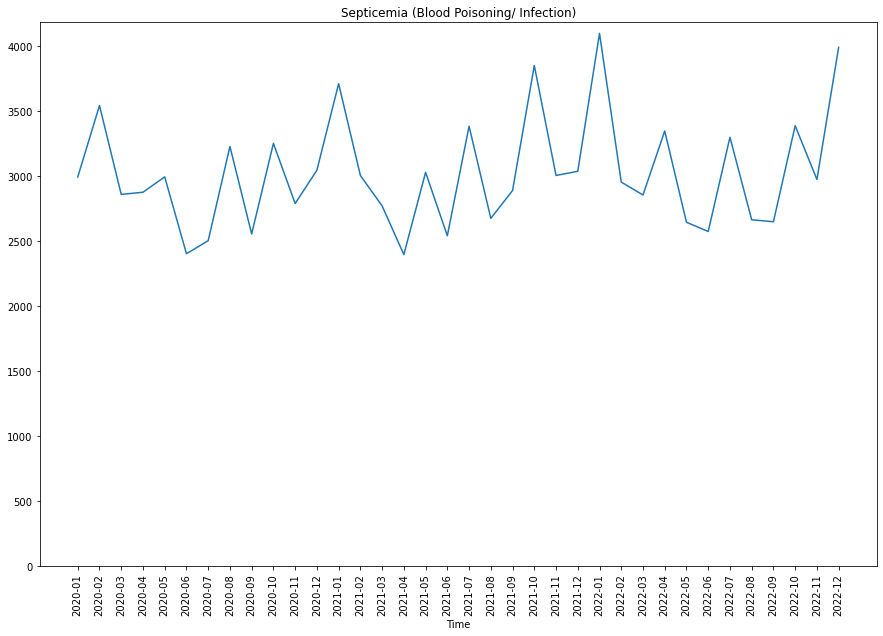

In [623]:
#TODO - Add in subplotting for all line graphs
#Septicemia (Blood Poisoning/ Infection) by Month-Year
x = death_by_month_year_df['Month-Year']
x = x.astype(str)
plt.figure(figsize=(15,10))
plt.plot(x, y1)
plt.ylim(0)
plt.title('Septicemia (Blood Poisoning/ Infection)')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Deaths')
plt.show()

TypeError: 'str' object is not callable

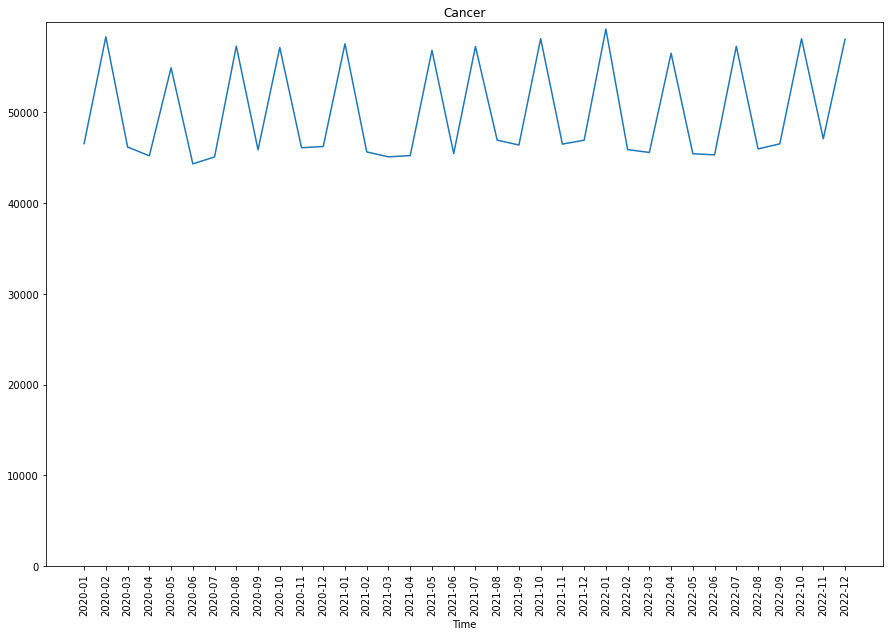

In [624]:
#Cancer by Month-Year
x = death_by_month_year_df['Month-Year']
x = x.astype(str)
plt.figure(figsize=(15,10))
plt.plot(x, y2)
plt.ylim(0)
plt.title('Cancer')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Deaths')
plt.show()

TypeError: 'str' object is not callable

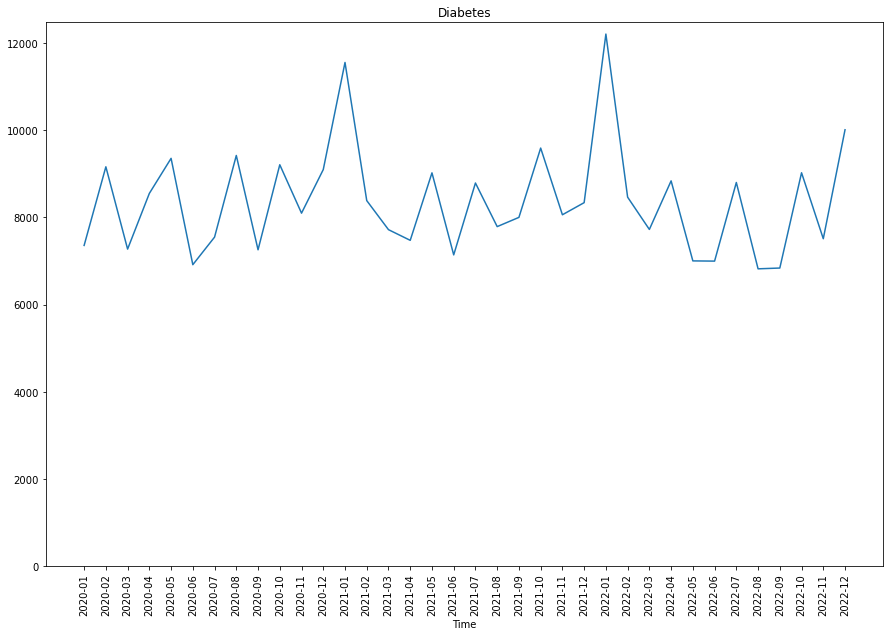

In [625]:
#Diabetes by Month-Year
x = death_by_month_year_df['Month-Year']
x = x.astype(str)
plt.figure(figsize=(15,10))
plt.plot(x, y3)
plt.ylim(0)
plt.title('Diabetes')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Deaths')
plt.show()

TypeError: 'str' object is not callable

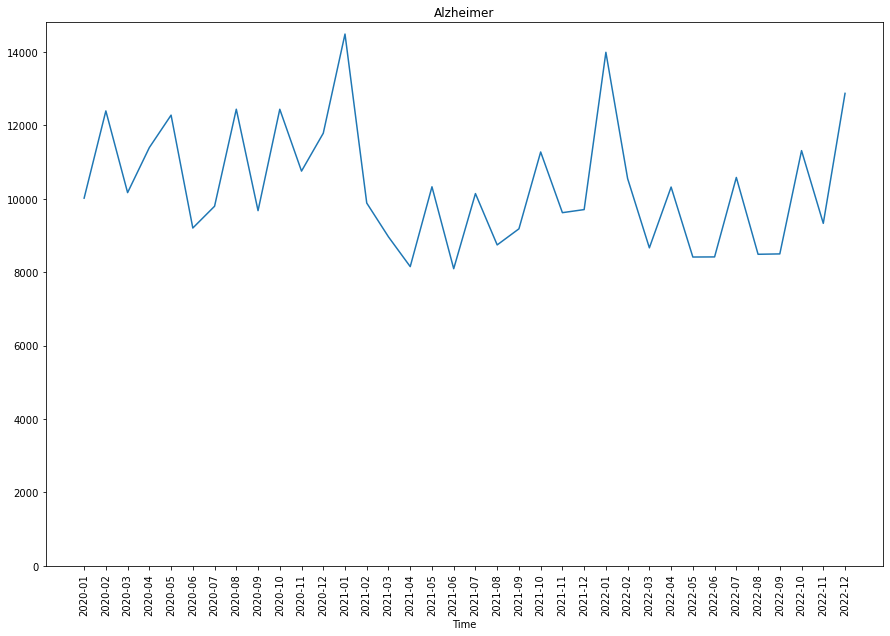

In [626]:
#Alzheimer Diseases by Month-Year
x = death_by_month_year_df['Month-Year']
x = x.astype(str)
plt.figure(figsize=(15,10))
plt.plot(x, y4)
plt.ylim(0)
plt.title('Alzheimer')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Deaths')
plt.show()

TypeError: 'str' object is not callable

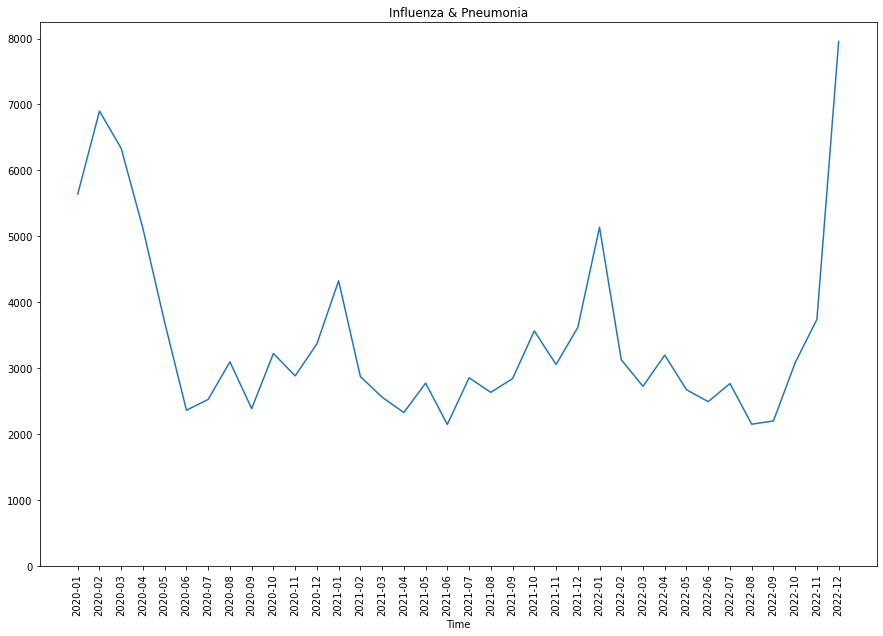

In [627]:
#Influenza & Pneumonia by Month-Year
x = death_by_month_year_df['Month-Year']
x = x.astype(str)
plt.figure(figsize=(15,10))
plt.plot(x, y5)
plt.ylim(0)
plt.title('Influenza & Pneumonia')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Deaths')
plt.show()

TypeError: 'str' object is not callable

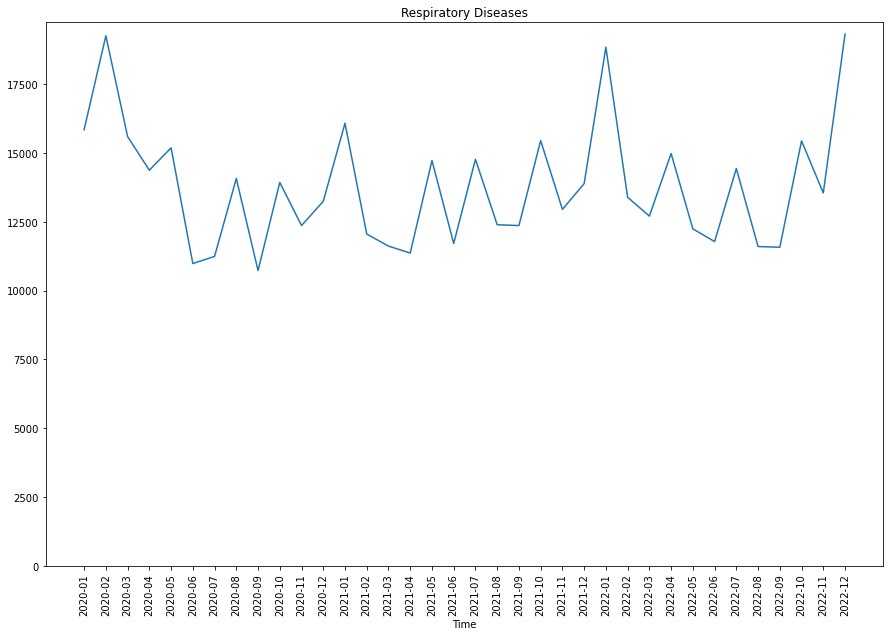

In [628]:
#Respiratory Diseases by Month-Year
x = death_by_month_year_df['Month-Year']
x = x.astype(str)
plt.figure(figsize=(15,10))
plt.plot(x, y6)
plt.ylim(0)
plt.title('Respiratory Diseases')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Deaths')
plt.show()

TypeError: 'str' object is not callable

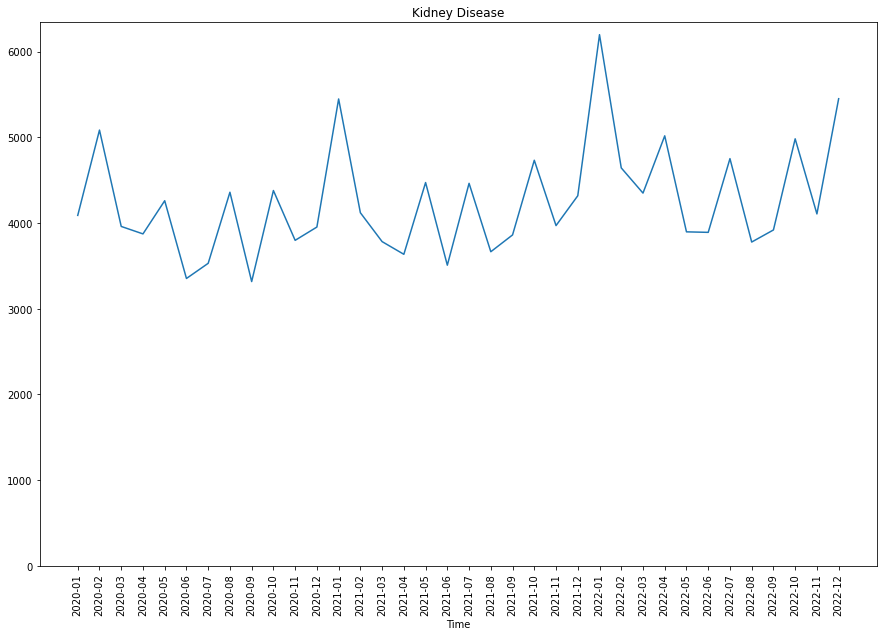

In [629]:
#Kidney Disease by Month-Year
x = death_by_month_year_df['Month-Year']
x = x.astype(str)
plt.figure(figsize=(15,10))
plt.plot(x, y7)
plt.ylim(0)
plt.title('Kidney Disease')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Deaths')
plt.show()

TypeError: 'str' object is not callable

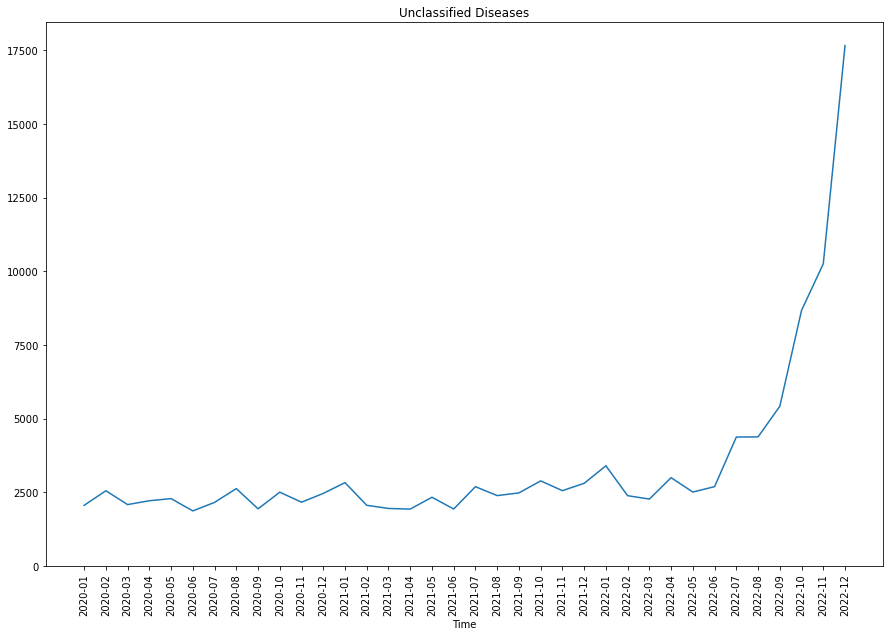

In [630]:
#Unclassified Diseases by Month-Year
x = death_by_month_year_df['Month-Year']
x = x.astype(str)
plt.figure(figsize=(15,10))
plt.plot(x, y8)
plt.ylim(0)
plt.title('Unclassified Diseases')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Deaths')
plt.show()

TypeError: 'str' object is not callable

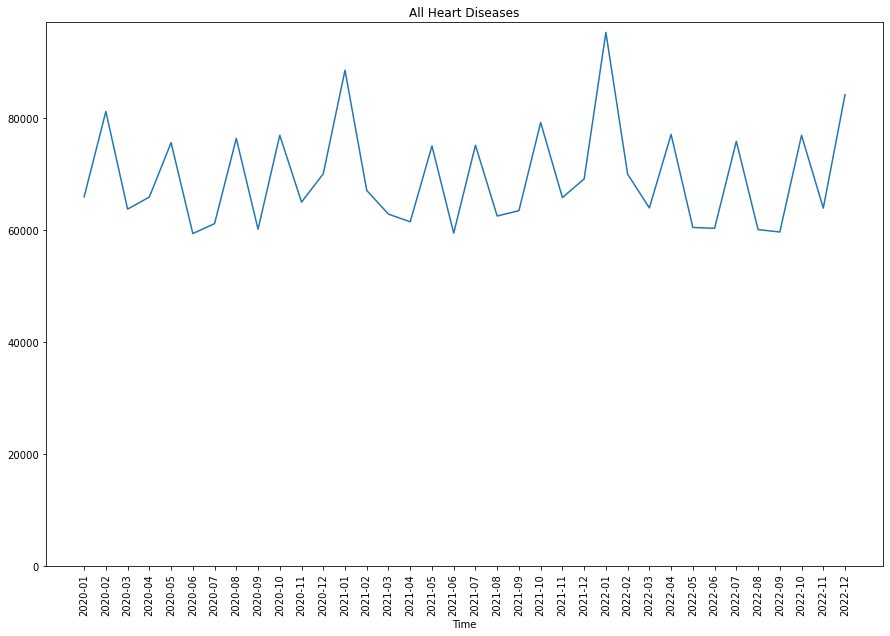

In [631]:
#Heart Diseases by Month-Year
x = death_by_month_year_df['Month-Year']
x = x.astype(str)
plt.figure(figsize=(15,10))
plt.plot(x, y9)
plt.ylim(0)
plt.title('All Heart Diseases')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Deaths')
plt.show()

TypeError: 'str' object is not callable

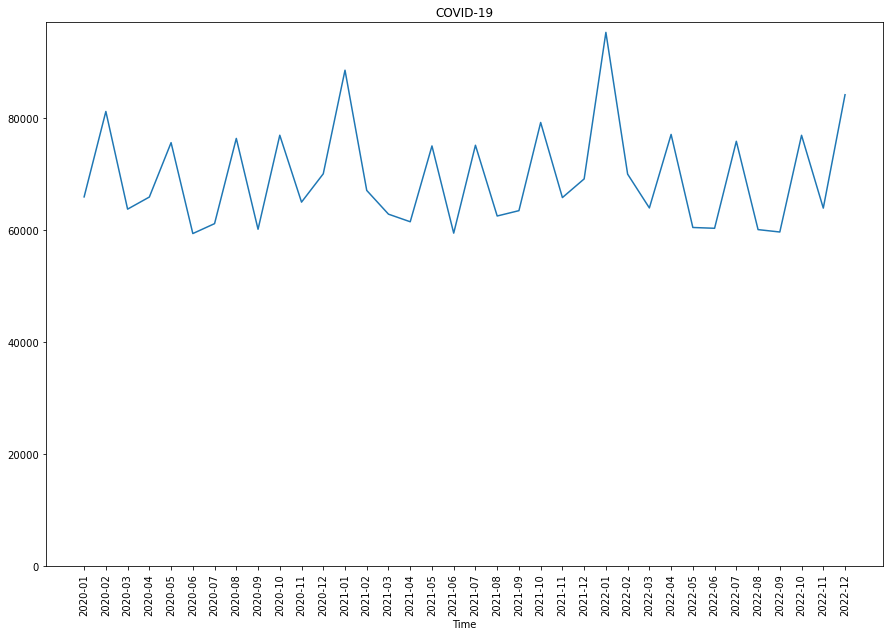

In [632]:
#COVID-19 by Month-Year
x = death_by_month_year_df['Month-Year']
x = x.astype(str)
plt.figure(figsize=(15,10))
plt.plot(x, y9)
plt.ylim(0)
plt.title('COVID-19')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Deaths')
plt.show()

In [654]:
#Merge Population Data
deaths_by_year = death_by_year_df.merge(population_by_year, how = 'left', on = 'Year')
deaths_by_year = deaths_by_year[['Year', 'Population', 'All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 'All Heart Diseases', 'COVID-19']]
#deaths_by_year = death_by_year['Population'].round().astype(int).reset_index()
deaths_by_year = deaths_by_year.fillna({'Population':0}).astype(int)
deaths_by_year.set_index('Year').T

Year,2020,2021,2022
Population,334793069,335294247,336509346
All Cause,3304183,3439985,3302866
Natural Cause,3022107,3129157,3022345
Septicemia (Blood Poisoning/ Infection),35028,36282,37426
Cancer,593303,598029,611014
Diabetes,99246,101871,100244
Alzheimer Diseases,132321,118556,121413
Influenza & Pneumonia,47525,35568,41248
Respiratory Diseases,166781,159323,169817
Kidney Disease,47955,49974,54980


In [652]:
#TODO - Break out into 2 tables, 1 for totals and another for rates

#death rate by year
death_rate_by_year = deaths_by_year
death_rate_by_year['All Causes Death Rate (%)']= deaths_by_year['All Cause'] / deaths_by_year['Population'] * 100
death_rate_by_year['Natural Cause Death Rate (%)']= deaths_by_year['Natural Cause'] / deaths_by_year['Population'] * 100
death_rate_by_year['Septicemia (Blood Poisoning/ Infection) Death Rate (%)']= deaths_by_year['Septicemia (Blood Poisoning/ Infection)'] / deaths_by_year['Population'] * 100
death_rate_by_year['Cancer Death Rate (%)']= deaths_by_year['Cancer'] / deaths_by_year['Population'] * 100
death_rate_by_year['Diabetes Death Rate (%)']= deaths_by_year['Diabetes'] / deaths_by_year['Population'] * 100
death_rate_by_year['Alzheimer Diseases Rate (%)']= deaths_by_year['Alzheimer Diseases'] / deaths_by_year['Population'] * 100
death_rate_by_year['Influenza & Pneumonia Death Rate (%)']= deaths_by_year['Influenza & Pneumonia'] / deaths_by_year['Population'] * 100
death_rate_by_year['Respiratory Diseases Death Rate (%)']= deaths_by_year['Respiratory Diseases'] / deaths_by_year['Population'] * 100
death_rate_by_year['Kidney Disease Death Rate (%)']= deaths_by_year['Kidney Disease'] / deaths_by_year['Population'] * 100
death_rate_by_year['Unclassified Death Rate (%)']= deaths_by_year['Unclassified'] / deaths_by_year['Population'] * 100
death_rate_by_year['All Heart Diseases Death Rate (%)']= deaths_by_year['All Heart Diseases'] / deaths_by_year['Population'] * 100
death_rate_by_year['COVID-19 Death Rate (%)']= deaths_by_year['COVID-19'] / deaths_by_year['Population'] * 100

death_rate_by_year = death_rate_by_year[['Year','All Causes Death Rate (%)', 'Natural Cause Death Rate (%)',
       'Septicemia (Blood Poisoning/ Infection) Death Rate (%)',
       'Cancer Death Rate (%)', 'Diabetes Death Rate (%)',
       'Alzheimer Diseases Rate (%)', 'Influenza & Pneumonia Death Rate (%)',
       'Respiratory Diseases Death Rate (%)', 'Kidney Disease Death Rate (%)',
       'Unclassified Death Rate (%)', 'All Heart Diseases Death Rate (%)',
       'COVID-19 Death Rate (%)']].set_index('Year').T

death_rate_by_year

Year,2020,2021,2022
All Causes Death Rate (%),0.986933,1.025960,0.981508
Natural Cause Death Rate (%),0.902679,0.933257,0.898146
Septicemia (Blood Poisoning/ Infection) Death Rate (%),0.010463,0.010821,0.011122
Cancer Death Rate (%),0.177215,0.178359,0.181574
Diabetes Death Rate (%),0.029644,0.030383,0.029789
Alzheimer Diseases Rate (%),0.039523,0.035359,0.036080
Influenza & Pneumonia Death Rate (%),0.014195,0.010608,0.012258
Respiratory Diseases Death Rate (%),0.049816,0.047517,0.050464
Kidney Disease Death Rate (%),0.014324,0.014905,0.016338
Unclassified Death Rate (%),0.008032,0.008594,0.019905


In [635]:
#TODO - Plot the rates into a visualization

In [636]:
# Highest death "All Cause" by year
death_by_year_df.sort_values('All Cause',ascending=False).head().set_index('Year')

,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
Year,,,,,,,,,,,,
2021,3439985,3129157,36282,598029,101871,118556,35568,159323,49974,28815,830234,877920
2020,3304183,3022107,35028,593303,99246,132321,47525,166781,47955,26889,821889,660940
2022,3302866,3022345,37426,611014,100244,121413,41248,169817,54980,66981,848261,435043


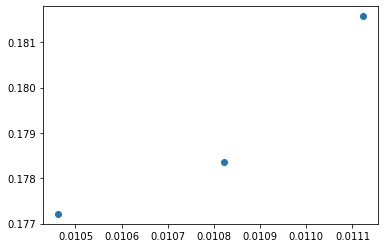

In [637]:
#TODO - Work through correlational analyses
death_rates = death_rate_by_year[['Year','All Causes Death Rate (%)',
                    'Natural Cause Death Rate (%)',
                    'Septicemia (Blood Poisoning/ Infection) Death Rate (%)',
                    'Cancer Death Rate (%)',
                    'Diabetes Death Rate (%)',
                    'Alzheimer Diseases Rate (%)',
                    'Influenza & Pneumonia Death Rate (%)',
                    'Respiratory Diseases Death Rate (%)',
                    'Kidney Disease Death Rate (%)',
                    'Unclassified Death Rate (%)',
                    'All Heart Diseases Death Rate (%)',
                    'COVID-19 Death Rate (%)']]

death_rates_data = death_rates.loc[death_rates['Year'].isin([2020,2021,2022])]

death_rates_data.set_index('Year')

col1 = death_rates_data['Septicemia (Blood Poisoning/ Infection) Death Rate (%)']
col2 = death_rates_data['Cancer Death Rate (%)']
corr = col1.corr(col2)
plt.scatter(col1,col2)
#corr
#ax = sns.heatmap(death_rates, linewidth = 0.5) 
plt.show()

In [638]:
death_by_year_df['All Cause per Million'] = death_by_year_df['All Cause'] / 1e6
All_death_by_year_df = death_by_year_df[["Year","All Cause per Million"]].set_index("Year")

TypeError: 'str' object is not callable

<Figure size 864x432 with 0 Axes>

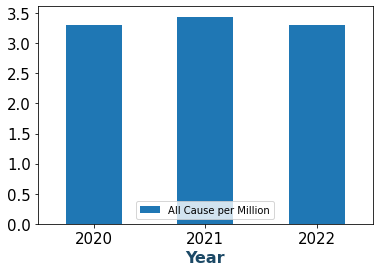

In [639]:
# Plot Deaths 
plt.figure(figsize=(12,6))
All_death_by_year_df.plot(kind ="bar",  rot = 0, align="center", fontsize = 15)

plt.xlabel("Year", fontsize = 16, color = "#1c4966", fontweight="bold")
plt.ylabel("Total Number of Death", fontsize = 16, color = "#1c4966", fontweight="bold")
plt.title("Deaths by Year", fontsize = 20, color = "#1c4966", fontweight="bold")

plt.show()

C:\Users\joshu\AppData\Local\Temp\ipykernel_8432\1720970128.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_rate_by_year_all_cause['Year'] = death_rate_by_year_all_cause['Year'].astype(str)


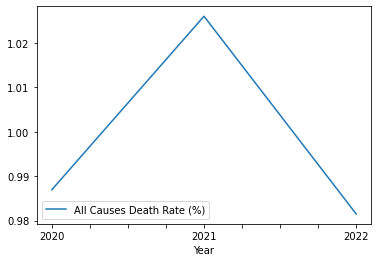

In [640]:
#Plot Death Rate
death_rate_by_year_all_cause = death_rate_by_year[['Year','All Causes Death Rate (%)']]
death_rate_by_year_all_cause['Year'] = death_rate_by_year_all_cause['Year'].astype(str)
death_rate_by_year_all_cause.iloc[0:3].plot('Year','All Causes Death Rate (%)')
# death_rate_by_year_all_cause.plot('Year','All Causes Death Rate (%)')
plt.show()

In [641]:
# Deaths by Month
death_by_month_df = clean_df.groupby(["Month"]).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

death_by_month_df = death_by_month_df.round().astype(int)

death_by_month_df.sort_values('All Cause',ascending=False).head(12)

,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
Month,,,,,,,,,,,,
January,1062917,985527,10799,163317,31123,38486,15102,50755,15733,8279,249948,388849
October,939717,857705,10488,173395,27826,35019,9871,44807,14093,14058,233231,164951
December,928878,868888,10070,151240,27449,34356,14941,46435,13721,22916,223502,260327
February,865951,794857,9499,149875,26013,32821,12901,44691,13847,6990,218392,187808
May,835573,755564,8665,157211,25381,31013,9138,42145,12629,7120,211235,124594
July,827926,743415,9183,159639,25140,30514,8147,40436,12744,9218,212290,93575
August,818004,741564,8564,150213,24031,29666,7879,38057,11802,9388,199086,169732
April,802659,730853,8616,146969,24864,29862,10640,40707,12525,7133,204591,127577
November,790490,727932,8765,139702,23670,29701,9679,38852,11874,14966,194835,161424


In [642]:
#TODO - Add map and subplotting by disease, use the same scale for the data points
# Deaths by state
death_by_state_df = clean_df.groupby(["State"]).sum()[['All Cause', 'Natural Cause',
       'Septicemia (Blood Poisoning/ Infection)', 'Cancer', 'Diabetes',
       'Alzheimer Diseases', 'Influenza & Pneumonia', 'Respiratory Diseases',
       'Kidney Disease', 'Unclassified', 
       'All Heart Diseases', 'COVID-19']]

death_by_state_df = death_by_state_df.round().astype(int)
death_by_state_df

,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,Diabetes,Alzheimer Diseases,Influenza & Pneumonia,Respiratory Diseases,Kidney Disease,Unclassified,All Heart Diseases,COVID-19
State,,,,,,,,,,,,
Alabama,191722,177397,3258,30683,4615,8371,2968,12679,3479,3445,53956,39337
Alaska,16450,14013,0,3019,0,0,0,0,0,0,66,1955
Arizona,235008,210301,891,39294,7541,8892,3019,14166,2444,3499,54010,55508
Arkansas,115620,106817,1317,19562,4217,4939,1568,4096,2194,313,30850,22272
California,971172,891528,5369,180936,34760,53261,16032,45705,14127,11408,253330,197272
Colorado,144518,126959,875,24906,3613,5841,560,7926,1152,714,31497,26764
Connecticut,107912,98627,1153,20085,2301,3258,972,4096,1710,759,25404,22449
Delaware,33654,30597,0,6687,243,664,0,82,10,93,8294,4919
District of Columbia,21371,18066,0,3553,10,0,0,0,0,148,1318,3085


In [643]:
# Highest death "All Cause" by state
top_10_state = death_by_state_df.sort_values('All Cause',ascending=False).head(10)
top_10_state = top_10_state['All Cause']
top_10_state

State
California        971172
Texas             770699
Florida           751790
Pennsylvania      461227
Ohio              430087
Illinois          369840
New York          348276
North Carolina    341200
Michigan          340194
Georgia           317935
Name: All Cause, dtype: int32

TypeError: 'str' object is not callable

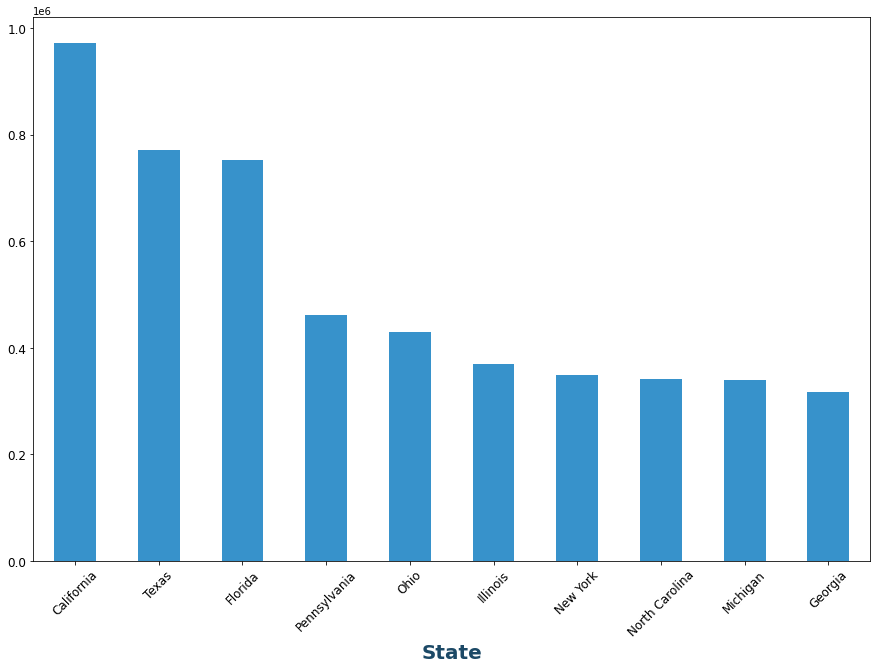

In [644]:
# Plot bar chart 
plt.figure(figsize=(15,10))
top_10_state.plot(kind ="bar", color = "#3792cb", rot = 45, align="center", fontsize = 12)

plt.xlabel("State", fontsize = 20, color = "#1c4966", fontweight="bold")
plt.ylabel("Total Number of Death", fontsize = 20, color = "#1c4966", fontweight="bold")
plt.suptitle("Top 10 All Death Cause in US",fontsize=30, color = "#1c4966", fontweight="bold")
plt.title("2020-2023", fontsize = 30, color = "#1c4966")


plt.show()

TypeError: 'str' object is not callable

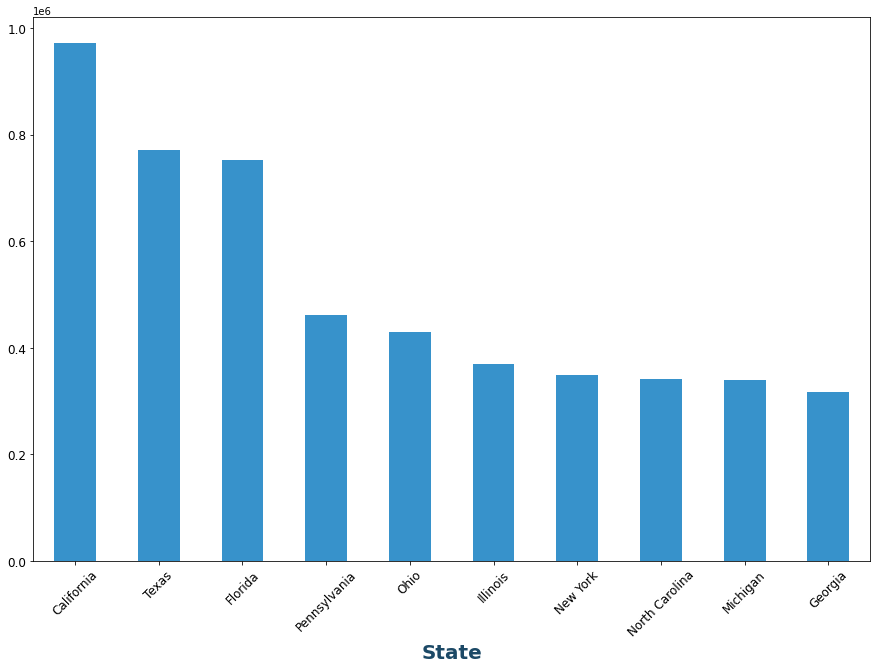

In [645]:
#TODO - Create data frame that has data by state and death rate, 10 worst and 10 best
# Plot Death Rate
plt.figure(figsize=(15,10))
top_10_state.plot(kind ="bar", color = "#3792cb", rot = 45, align="center", fontsize = 12)

plt.xlabel("State", fontsize = 20, color = "#1c4966", fontweight="bold")
plt.ylabel("Total Number of Death", fontsize = 20, color = "#1c4966", fontweight="bold")
plt.suptitle("Top 10 All Death Cause in US",fontsize=30, color = "#1c4966", fontweight="bold")
plt.title("2020-2023", fontsize = 30, color = "#1c4966")


plt.show()

In [646]:
death_by_3_years_df = clean_df.loc[clean_df["Year"]!=2023]
death_by_3_years_df.head()

,State,Date,Month,Year,Month-Year,Week,All Cause,Natural Cause,Septicemia (Blood Poisoning/ Infection),Cancer,...,Other Diseases of Respiratory System,Respiratory Diseases,Kidney Disease,Unclassified,Heart Diseases,Cerebrovascular Diseases,All Heart Diseases,COVID-19 (Multiple Cause of Death),COVID-19 (Underlying Cause of Death),COVID-19
0,Alabama,2020-01-04,January,2020,2020-01,1,1082.0,1009.0,15.0,196.0,...,13.0,99.0,25.0,25.0,268.0,81.0,349.0,0.0,0.0,0.0
1,Alabama,2020-01-11,January,2020,2020-01,2,1127.0,1060.0,25.0,197.0,...,20.0,92.0,23.0,34.0,274.0,68.0,342.0,0.0,0.0,0.0
2,Alabama,2020-01-18,January,2020,2020-01,3,1039.0,976.0,28.0,201.0,...,21.0,94.0,23.0,24.0,239.0,45.0,284.0,0.0,0.0,0.0
3,Alabama,2020-01-25,January,2020,2020-01,4,1056.0,982.0,16.0,190.0,...,11.0,72.0,14.0,23.0,284.0,70.0,354.0,0.0,0.0,0.0
4,Alabama,2020-02-01,February,2020,2020-02,5,1026.0,949.0,15.0,157.0,...,17.0,93.0,20.0,23.0,265.0,55.0,320.0,0.0,0.0,0.0
